# 4. QASM-Simulator

Ein Quantenschaltkreis kann entweder zur Berechnung an einen echten Quantencomputer geschickt werden oder aber von einem Quantensimulator berechnet/ausgewertet werden. 

Der QASM-Simulator ist ein von Qiskit bereitgestellter Simulator, der den Quantenschaltkreis ausführt und seine Messergebnisse berechnet. Er ist vor allem nützlich, wenn der Quantenschaltkreis Messanweisungen für Qubits enthält. Der QasmSimulator bietet verschiedene Simulations- und Konfigurationsmöglichkeiten, welche als **Schlüsselargumente** (kwargs) der Funktion übergeben werden.

Näheres erfahren Sie hier:
[Qiskit-Referenz](https://qiskit.github.io/qiskit-aer/stubs/qiskit_aer.QasmSimulator.html)

Der QASM-Simulator gehört zu dem Python basierten Modul *BasicAer*, das hier als erstes von Qiskit importiert wird und der anschliessend als Backend festgelegt wird ([Referenz](https://docs.quantum.ibm.com/api/qiskit/0.19/providers_basicaer)):


In [1]:
from qiskit import BasicAer
backend = BasicAer.get_backend('qasm_simulator')

Danach wird das Modul `QuantumCirquit` von Qiskit eingebunden, der Schaltkreis, bestehend aus zwei Qubits (im Zustand $00$) und zwei klassischen Bits, definiert und schliesslich auf beide Qubits die Hadamard-Transformation angewendet:

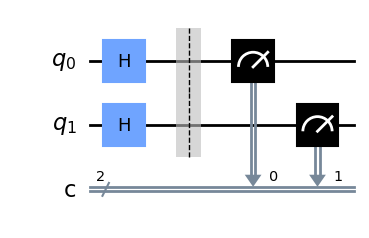

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.barrier()
qc.measure([0, 1], [0, 1])
qc.draw('mpl') # Schaltkreis mit MathPlotLib zeichnen

Präparation und Messung sind wieder durch eine Barriere optisch getrennt. Die Anweisung *qc.measure([0, 1], [0, 1])* besagt, dass beide Qubits [0, 1] gemessen werden sollen und das Ergebnis anschliessend in den beiden klassischen Bits [0, 1] abgelegt wird.

Damit der Schaltkreis ausgeführt werden kann, wird wieder die Funktion *execute* eingebunden und anschliessend ausgeführt:


In [3]:
from qiskit.execute_function import execute

job = execute(qc, backend)

Wenn Sie wissen wollen, was in der String-Variablen `job` gespeichert ist, können Sie sie wieder mit `print(job)` ausdrucken. Das gewünschte Messergebnis muss nun mit der Methode `.result()` extrahiert werden. Dieses wird anschliessend in der Variablen `result` abgespeichert. Wieder können Sie mit `print (result)` ihren Inhalt erkunden.

In [4]:
result = job.result()

Aus der Stringvariablen `result` extrahieren wir nun mit der Methode `.get_counts()` das Messergebnis:

In [5]:
counts = result.get_counts()
print(counts)

{'00': 247, '10': 289, '11': 244, '01': 244}


Würde der Schaltkreis nur einmal durchlaufen, hätten wir eines der vier möglichen Ergebnisse. $00$, $01$, $10$ oder $11$. Dieses Ergebnis ist rein zufällig und kann nicht vorausgesagt werden. Eine Messung gibt uns somit keine Auskunft über den Zustand des Registers nach Anwendung der beiden Hadamard-Transformationen. Damit wir Informationen über den Registerzustand erhalten, müssen wir entweder eine grosse anzahl von Zwei-Qubitregistern exakt gleich präparieren und anschliessend Messen. Hier wird der Schaltkreis viele Male durchlaufen und die Messergebnisse nach Häufigkeit geordnet.
Genau das zeigt die Variable `counts` Sie ordnet jedem möglichen Messergebnis (z. B. `'00'`) nach dem Doppelpunkt die Häufigkeit dieses Messwerts zu (hier `252`). Summieren Sie alle Häufigkeiten auf, erhalten Sie: $252+256+264+252=1024$. Das heisst, der Schaltkreis wurde $1024$mal durchlaufen und somit liegen $1024$ Messergebnisse vor. Die Anzahl Durchläufe (`shots`) kann auch selbst gewählt werden. Dazu schreiben Sie oben in der Execute-Funktion: `job = execute(qc, backend, shots = 512)` falls Sie nur $512$ Durchläufe wollen.*

Das Ergebnis hann auch in einem Histogramm dargestellt werden:

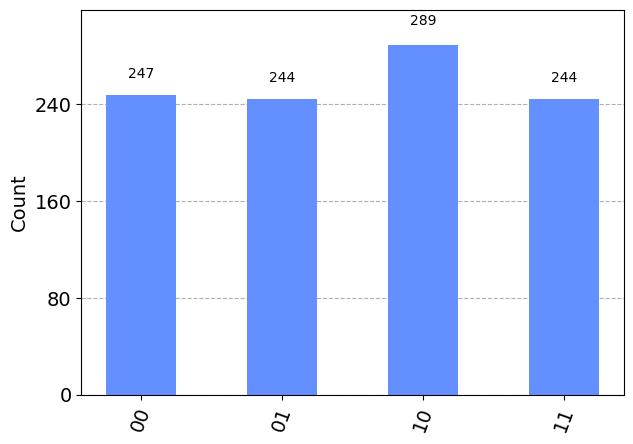

In [6]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

Die Histogramm-Funktion wird im nächsten Notebook Nr. 5 näher erklärt. 

Wenn Sie dieses Notebook hier mehrmals durchlaufen, sehen Sie übrigens, dass sich die Verteilung der Messwerte jedesmal leicht verändert. Bei wenigen Shots erhält man eine grosse Streuung und bei vielen Shots nähern sich die Werte einer Gleichberteilung. Probieren Sie es selbst aus!

* Das *Shot*-Argument in  `execute` wird in neueren Qiskit-Versionen nicht mehr unterstützt. Siehe dazu die folgende [Referenz](https://github.com/Qiskit/qiskit/issues/6741).